# <font color='red' style='font-size: 30px;'>Bibliotecas usadas</font>
<hr style='border: 2px solid red;'>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import autocorrelation_plot
import math

%matplotlib inline

# <font color='red' style='font-size: 30px;'>Analisando dataset</font>
<hr style='border: 2px solid red;'>

## Leitura dos dados

In [3]:
dados = pd.read_csv('jena_climate_2009_2016.csv')

# Utilizando uma subamostra dos dados de intervalos de 10 minutos para intervalos de uma hora
dados = dados[5::6]

#Visualizando as cinco primeiras linhas do dataframe
dados.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [4]:
# verificando o tipo de cada atributo

tipos_de_dados = pd.DataFrame(dados.dtypes, columns=['Tipos de dados'])
tipos_de_dados.columns.name = 'Variáveis'
tipos_de_dados

Variáveis,Tipos de dados
Date Time,object
p (mbar),float64
T (degC),float64
Tpot (K),float64
Tdew (degC),float64
rh (%),float64
VPmax (mbar),float64
VPact (mbar),float64
VPdef (mbar),float64
sh (g/kg),float64


In [5]:
#Verificando se há valores nulos no dataframe

print ('Quantidade de dados nulos \n', dados.isna().sum())

#Portanto, conforme o print, foram realmente colhidas informações para todos os tempos.

Quantidade de dados nulos 
 Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64


In [6]:
# Verificando dados sujos
sujos_dados = dados['T (degC)'] == 0
sujos_dados.sum()

28

In [7]:
# Filtrando dados sujos
dados[sujos_dados] # apenas dados sujos
dados[~sujos_dados] # apenas dados não-sujos
dados = dados[~sujos_dados] # mudando o dataframe

In [8]:
#Tratamento da coluna “Date Time” para converter a coluna de object para datetime 
dados["Date Time"]= pd.to_datetime(dados["Date Time"])

# Utilizar tal coluna como o índice das linhas do DataFrame
#Assim focaremos nos dados que queremos
dados = dados.set_index('Date Time')

# Mostrar 5 primeiras linhas para verificar se funcionou
dados.head()


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


# <font color='red' style='font-size: 30px;'>Autocorrelação</font>
<hr style='border: 2px solid red;'>

### A função de autocorrelação é a principal ferramenta de diagnóstico para análise de time series.

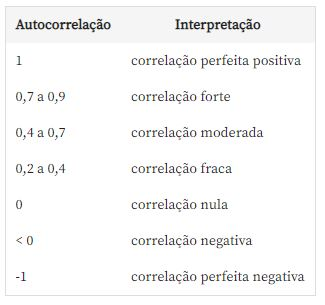

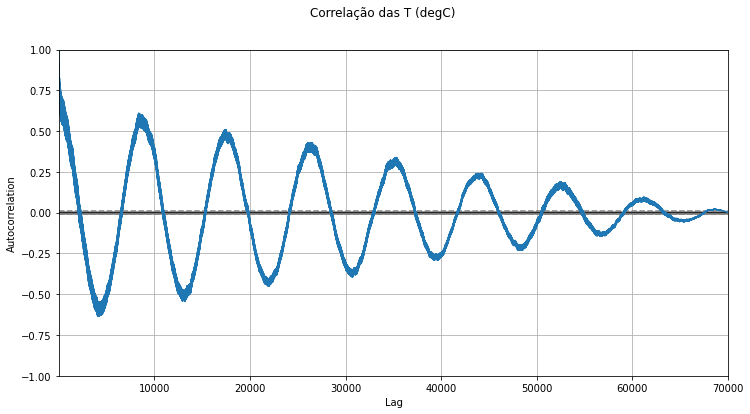

In [9]:
#Descobrir o nível de correlação das T (degC)
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das T (degC)') 
autocorrelation_plot(dados['T (degC)'])
ax=ax

#Nesse gráfico, haverá uma correlação significativa no Lag 1 que descrescerá com o passar do tempo, até se tornar nula. 
#Poderemos reparar nesse gráfico, então, inicialmente as primeiras horas parecerão ter um pouco de ligação umas com as outras, mas a prevalencia das primeiras horas é ligação moderada até por volta do Lag 27000. 
#Com o passar do tempo ela será menor até a nulidade.
#A ligação forma uma onda com valores positivos e negativos

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [10]:
# Descrever as propriedades estatísticas mais importantes
dados.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,70063.000000,70063.000000,70063.000000,70063.000000,70063.000000,70063.00000,70063.000000,70063.000000,70063.000000,70063.000000,70063.000000,70063.000000,70063.000000,70063.000000
mean,989.212956,9.454258,283.496864,4.959438,76.006327,13.57956,9.535712,4.043777,6.023663,9.642198,1216.044197,1.702561,2.963074,174.793829
std,8.357549,8.422947,8.504004,6.729583,16.474929,7.73999,4.183550,4.899104,2.655746,4.234755,39.972124,65.460584,75.612754,86.625603
min,913.600000,-22.760000,250.850000,-24.800000,13.880000,0.97000,0.810000,0.000000,0.510000,0.810000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.450000,0.250000,65.210000,7.78000,6.220000,0.870000,3.920000,6.290000,1187.460000,0.990000,1.760000,125.250000
50%,989.570000,9.420000,283.470000,5.210000,79.300000,11.82000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.980000,198.200000
75%,994.720000,15.480000,289.530000,10.080000,89.400000,17.61000,12.360000,5.300000,7.810000,12.490000,1242.725000,2.860000,4.740000,234.000000
max,1015.290000,37.280000,311.210000,23.060000,100.000000,63.77000,28.250000,46.010000,18.070000,28.740000,1393.540000,14.010000,23.500000,360.000000


## Matriz de correlação

In [11]:
#Em vez de utilizar todos os atributos para as previsões, obter uma representação reduzida do dataset que produza os mesmos resultados analíticos
#A matriz de correlação mede se há e qual o grau de dependência entre variáveis, ou seja, o quanto uma variável interfere em outra.
#Observando a matriz de correlação abaixo foi considerado usar em vez dos 14 atributos, usar 6 destes.
#Sendo: p (mbar),rh (%),VPact (mbar),wv (m/s),max. wv (m/s) e wd (deg)
#Mais abaixo, foi utilizada o coeficiente de determinaçãoque nos retornou como resposta que usar apenas essas 6 colunas, já nos returna uma acurácia de 95% em alguns modelos

dados.corr().round(4)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.0000,-0.0453,-0.1247,-0.0667,-0.0182,-0.0315,-0.0544,-0.0033,-0.0698,-0.0698,0.3076,-0.0057,-0.0074,-0.0638
T (degC),-0.0453,1.0000,0.9968,0.8957,-0.5726,0.9511,0.8676,0.7616,0.8667,0.8671,-0.9634,-0.0049,-0.0039,0.0415
Tpot (K),-0.1247,0.9968,1.0000,0.8949,-0.5673,0.9472,0.8662,0.7569,0.8665,0.8669,-0.9813,-0.0044,-0.0033,0.0464
Tdew (degC),-0.0667,0.8957,0.8949,1.0000,-0.1568,0.7991,0.9684,0.4356,0.9676,0.9681,-0.8852,-0.0086,-0.0097,0.0525
rh (%),-0.0182,-0.5726,-0.5673,-0.1568,1.0000,-0.6161,-0.1516,-0.8438,-0.1510,-0.1511,0.5145,-0.0042,-0.0086,-0.0173
VPmax (mbar),-0.0315,0.9511,0.9472,0.7991,-0.6161,1.0000,0.8247,0.8756,0.8243,0.8243,-0.9015,-0.0044,-0.0032,-0.0068
VPact (mbar),-0.0544,0.8676,0.8662,0.9684,-0.1516,0.8247,1.0000,0.4490,0.9999,0.9999,-0.8502,-0.0094,-0.0109,0.0209
VPdef (mbar),-0.0033,0.7616,0.7569,0.4356,-0.8438,0.8756,0.4490,1.0000,0.4485,0.4485,-0.6982,0.0011,0.0043,-0.0287
sh (g/kg),-0.0698,0.8667,0.8665,0.9676,-0.1510,0.8243,0.9999,0.4485,1.0000,1.0000,-0.8533,-0.0093,-0.0107,0.0219
H2OC (mmol/mol),-0.0698,0.8671,0.8669,0.9681,-0.1511,0.8243,0.9999,0.4485,1.0000,1.0000,-0.8538,-0.0093,-0.0107,0.0222


# <font color='red' style='font-size: 30px;'>Estimando a variável 'T (degC)'.</font>
<hr style='border: 2px solid red;'>

O conjunto de algorítimos de Aprendizado Supervisionado é extenso mas como na maioria dos casos trabalhamos com séries temporais de valores numéricos estamos interessados em algorítmos cuja saída são números reais. Sendo estes: Regressão Linear, Ridge, Lasso, ElasticNet, k-Nearest Neighbors (kNN), Árvores de Decisão, Florestas Aleatórias, Máquinas de Vetores de Suporte (SVM), Redes Neurais, normalmente redes recorrentes (RNN)

Como a variável 'T (degC)' não é categorica, iremos usar para as predições os modelos lineares regressão linear e o SVM:

In [12]:
#Obtendo a variável independente
y = dados['T (degC)']

In [13]:
#Obtendo as variáveis explicativas
#O r2 nos dará a resposta se as colunas selecionadas são o suficiente para entender
X = dados[['p (mbar)','rh (%)','VPact (mbar)','wv (m/s)','max. wv (m/s)','wd (deg)']]

In [14]:
#Separando os dados de treino e teste
#70% será usado para treinamento e 30% para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [15]:
#Erro Quadrático Médio (MSE) é uma métrica muito utilizada
#É métrica de avaliação excelente para problemas nos quais grandes erros não são tolerados, como é o caso de exames médicos e projeções de preços.

#Raiz do erro quadrático médio (RMSE) entra como uma forma de melhorar a interpretabilidade da métrica, acertando a unidade

#O coeficiente de determinação é uma medida de ajuste de um modelo estatístico linear generalizado, como a regressão linear simples ou múltipla

def previsao_y(modelo):
  #Realizando o treinamento do modelo
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse =  math.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print('{} obteve: \n mse: {}\n rmse:{}\n r2: {}'.format(modelo, mse, rmse, r2))
  




In [16]:
classifiers = [
    svm.SVR(),
    linear_model.LinearRegression()]

for item in classifiers:
  modelo = item
  y_pred = previsao_y(modelo)

#Nos dados acima, o modelo de regressão linear obtive a melhor acurácia (R2) em comparação ao SVM.

SVR() obteve: 
 mse: 28.64909173010381
 rmse:5.35248463146825
 r2: 0.6019423236251662
LinearRegression() obteve: 
 mse: 3.4712958011644464
 rmse:1.8631413798111098
 r2: 0.9517689442430282
